# Problem Statement:
To build a machine learning model to classify
if the given data of a patient should tell if the patient is at the risk of a heart attack.

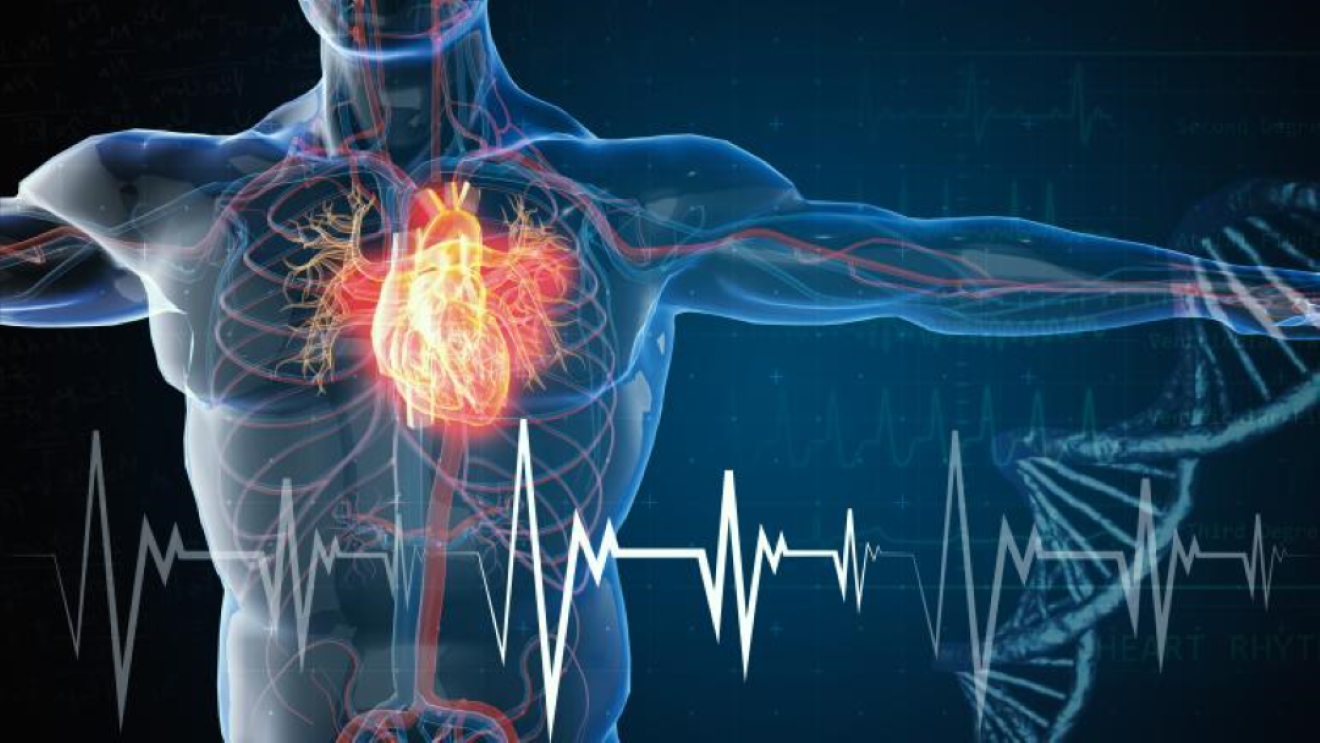

Tasks To Be Performed:
1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv("dataset.csv")

In [3]:
#Check the head of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Check the shape of the dataset
df.shape

(303, 14)

In [5]:
#Check the column types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Check the null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Check for duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
#Drop the duplicates
df.drop_duplicates(inplace = True)

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [10]:
#Check the statistical information about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Check the correlation between all fields
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

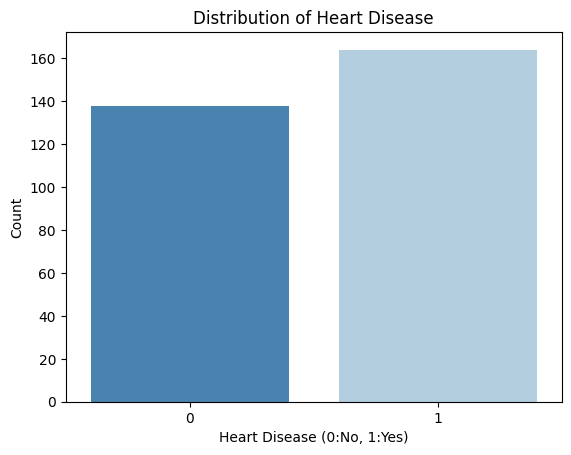

In [14]:
#Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(x = 'target', data = df, palette = 'Blues_r')
plt.xlabel('Heart Disease (0:No, 1:Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

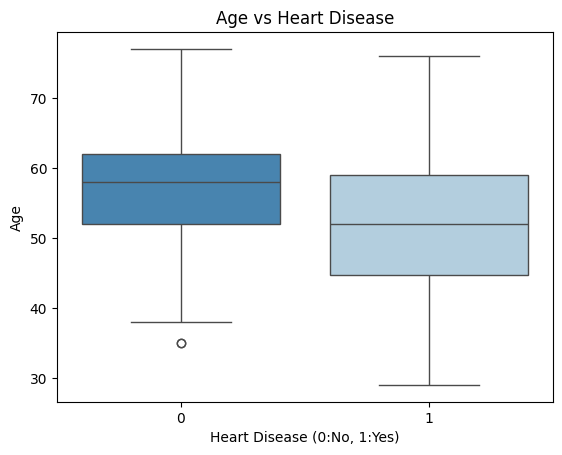

In [16]:
#Visualize the age and whether a patient has disease or not
sns.boxplot(x = 'target', y = 'age', data = df, palette = 'Blues_r')
plt.xlabel('Heart Disease (0:No, 1:Yes)')
plt.ylabel('Age')
plt.title('Age vs Heart Disease')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

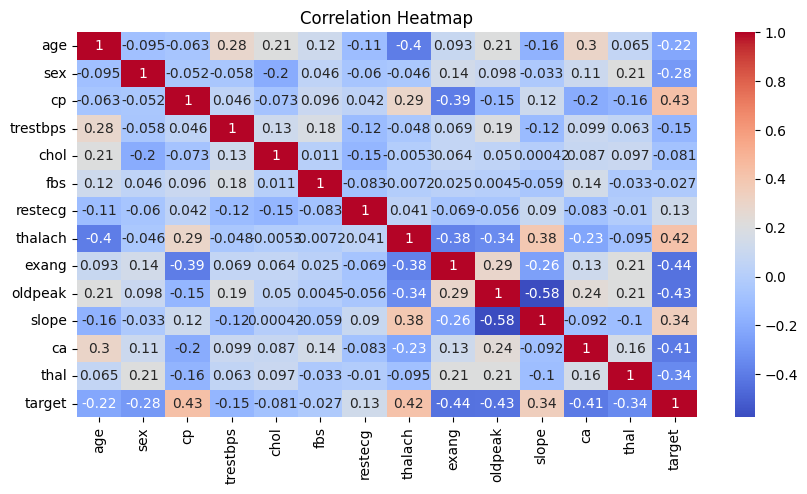

In [17]:
#Visualize the correlation among all fields
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')


Pairplot for Continuous Variables:


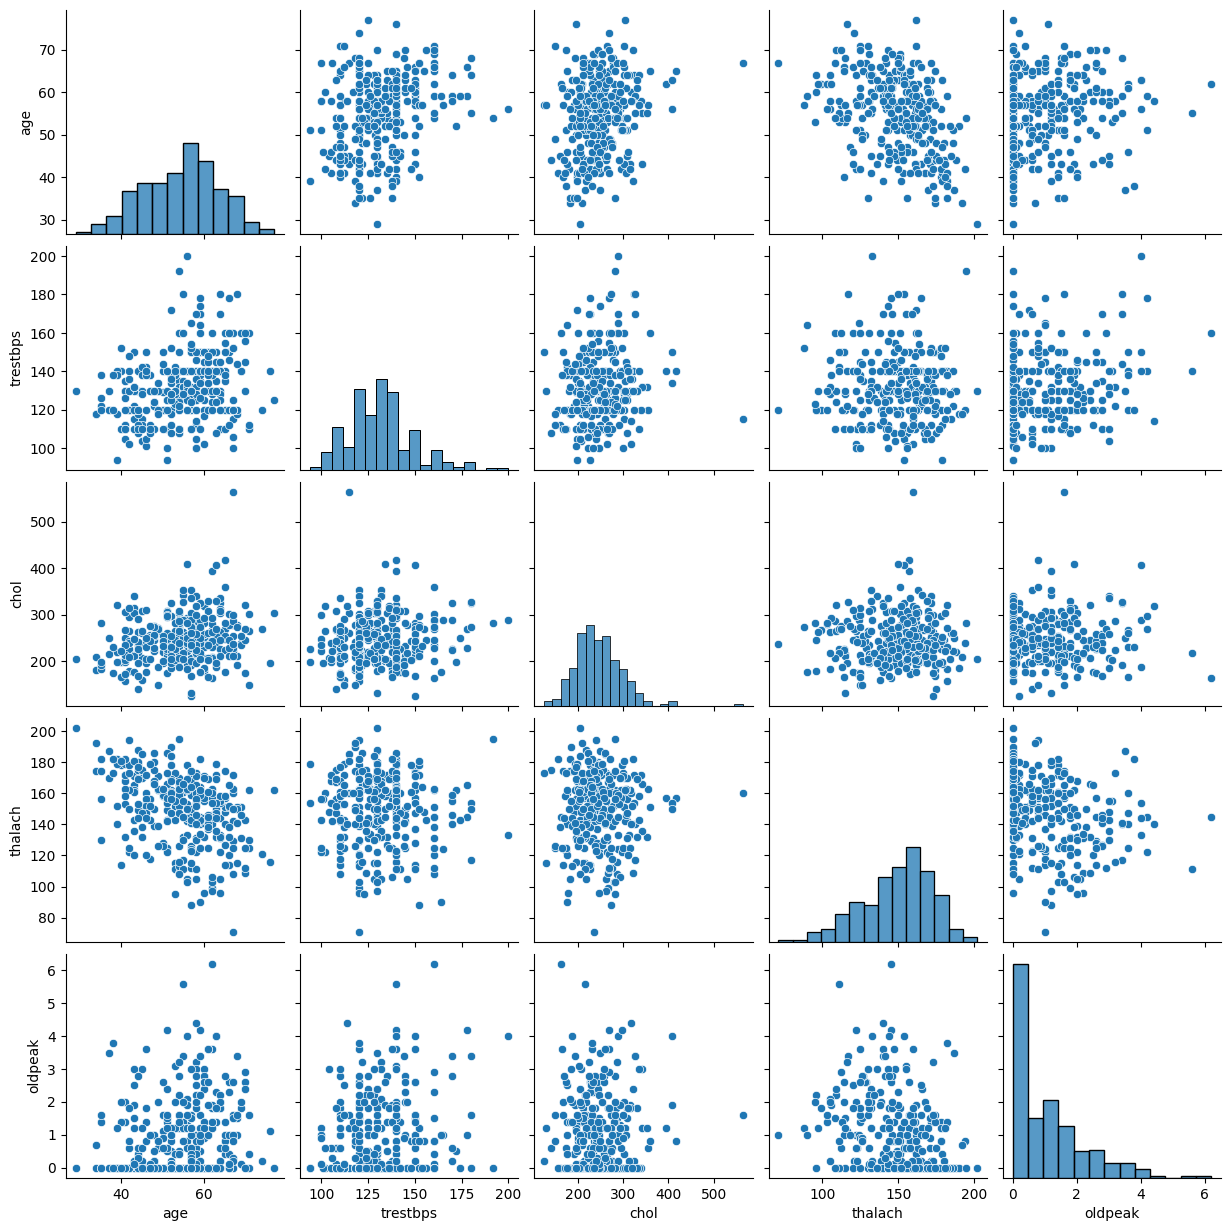

In [18]:
# Pairplot for continuous variables
print("\nPairplot for Continuous Variables:")
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.show()


Countplot for Categorical Variables:


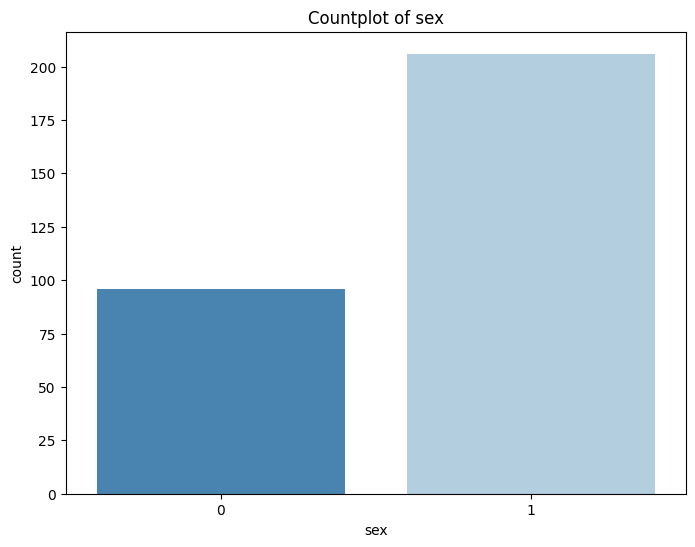

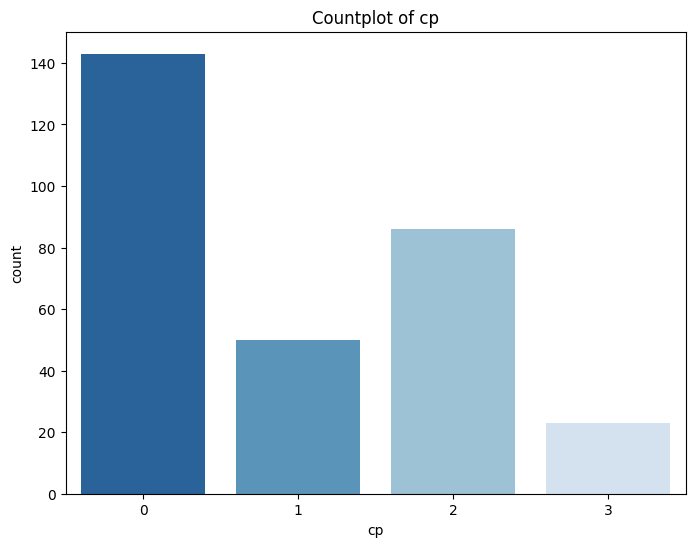

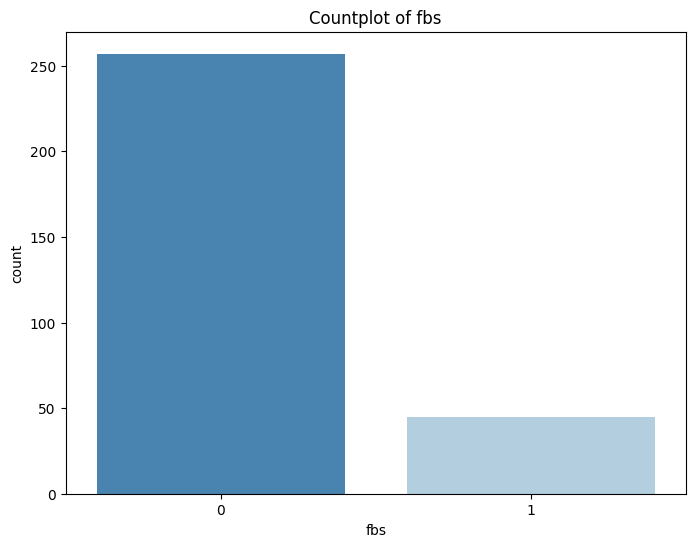

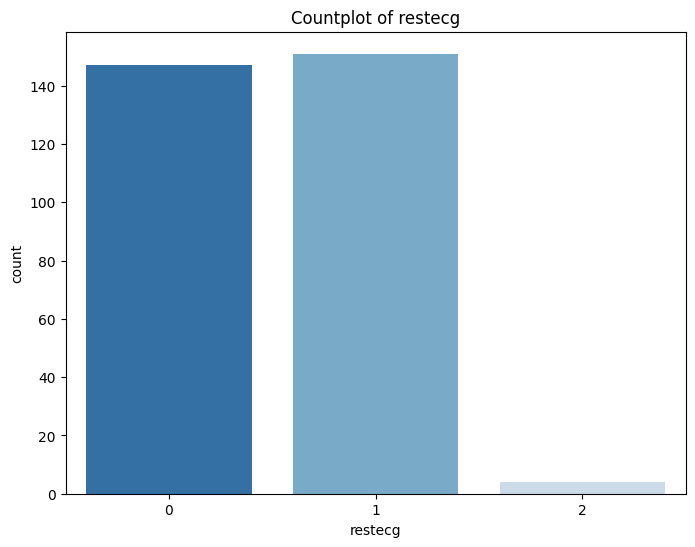

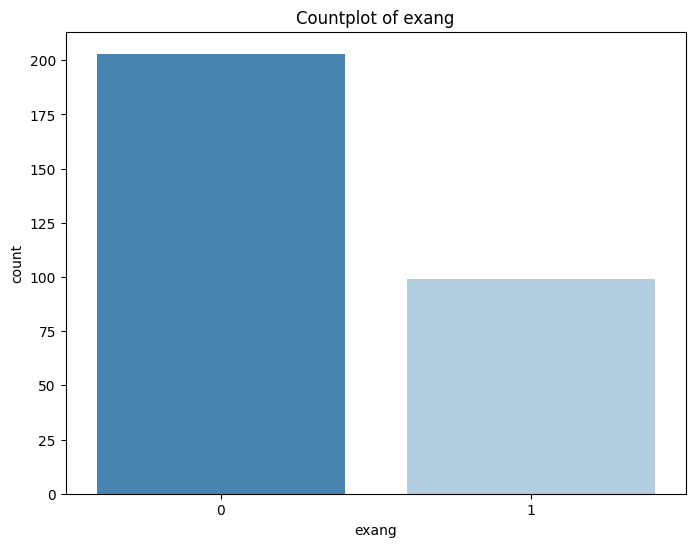

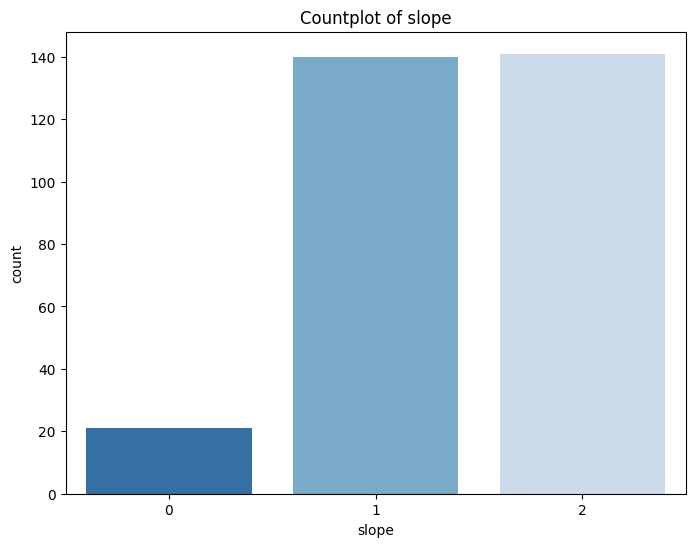

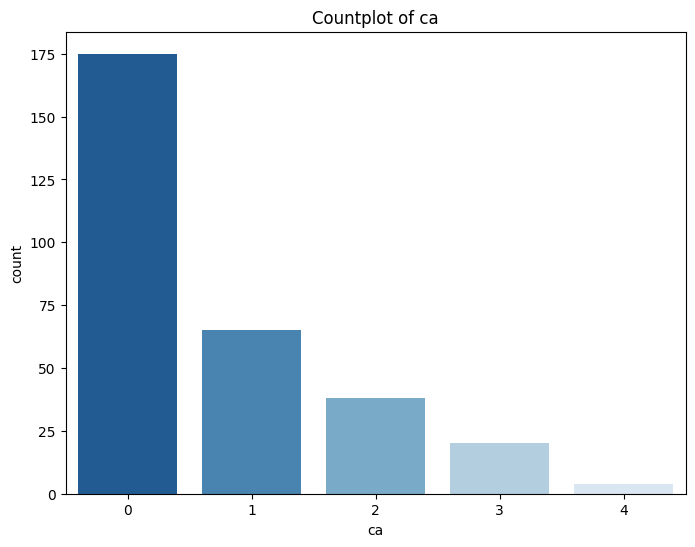

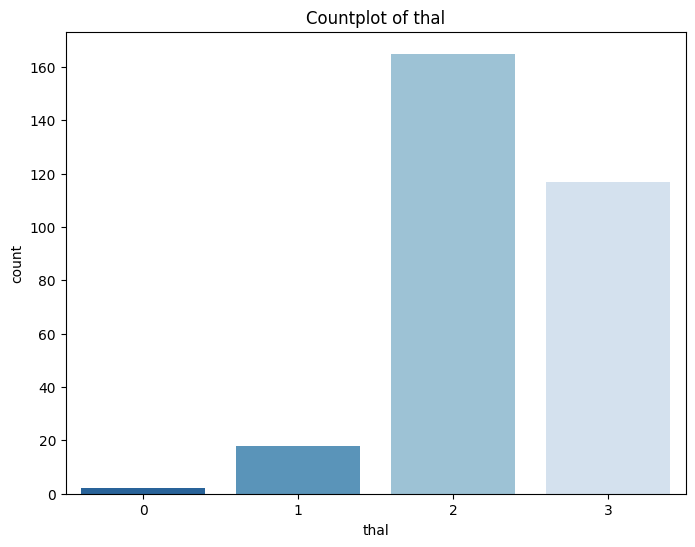

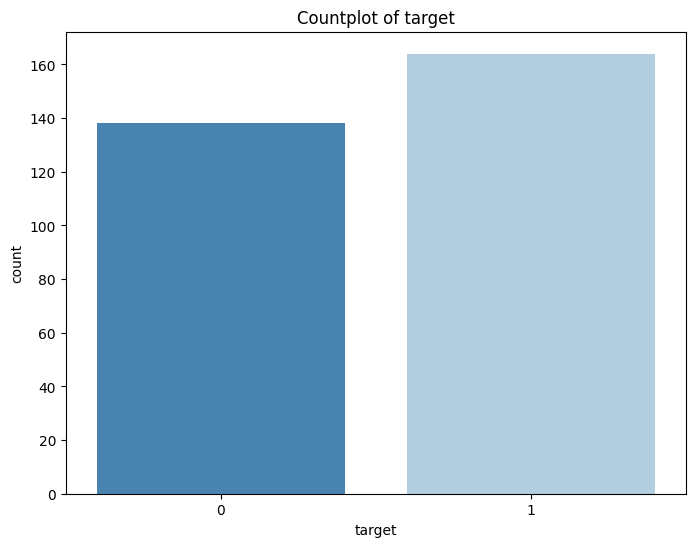

In [19]:
# Countplot for categorical variables
print("\nCountplot for Categorical Variables:")
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df, palette='Blues_r')
    plt.title(f'Countplot of {var}')
    plt.show()

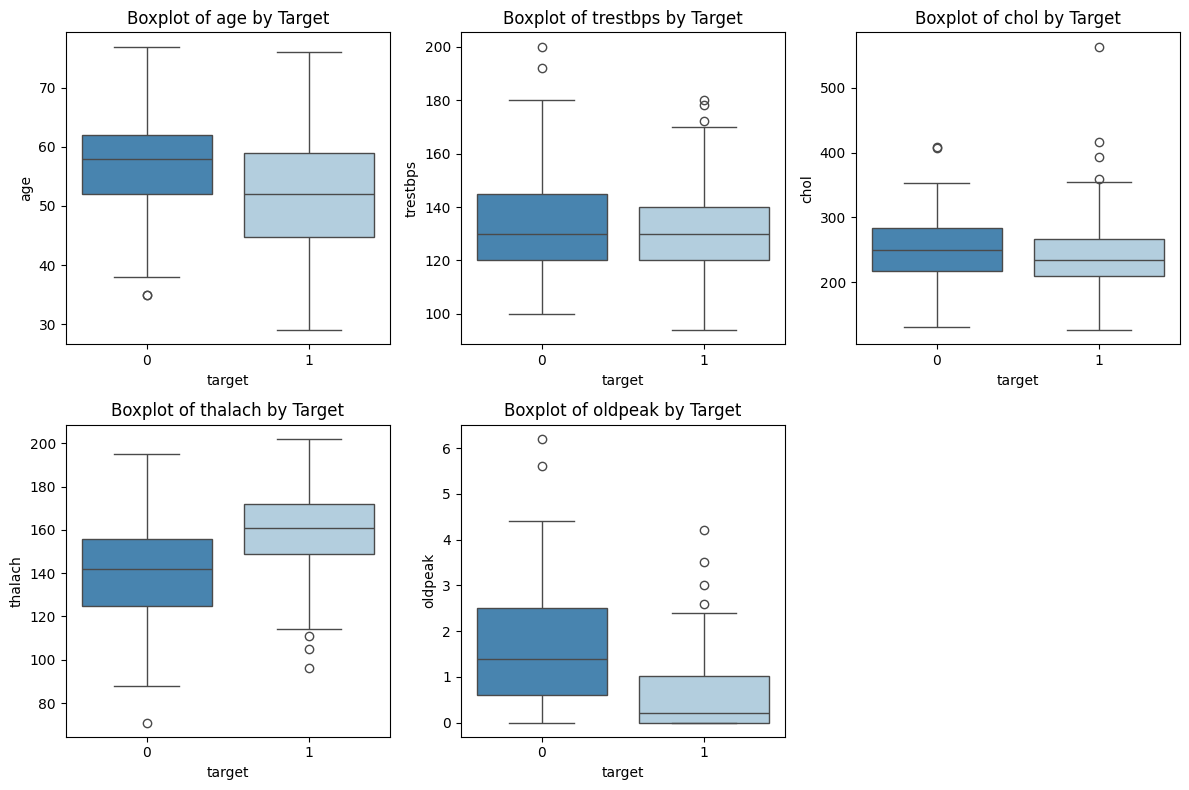

In [24]:
# Boxplot for numeric variables by Target variable
plt.figure(figsize=(12, 8))
numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=var, data=df, palette = 'Blues_r')
    plt.title(f'Boxplot of {var} by Target')
plt.tight_layout()
plt.show()

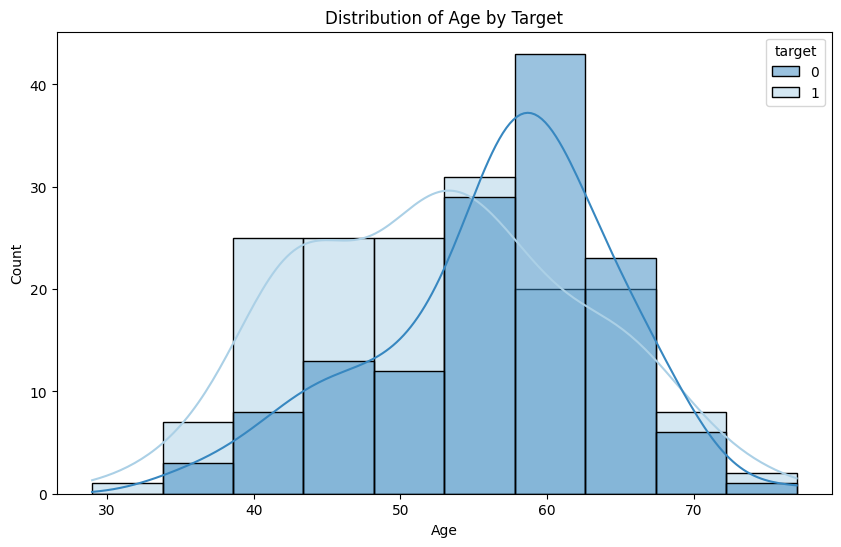

In [25]:
# Distribution of Age by Target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=10, kde=True, hue='target', palette='Blues_r')
plt.title('Distribution of Age by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

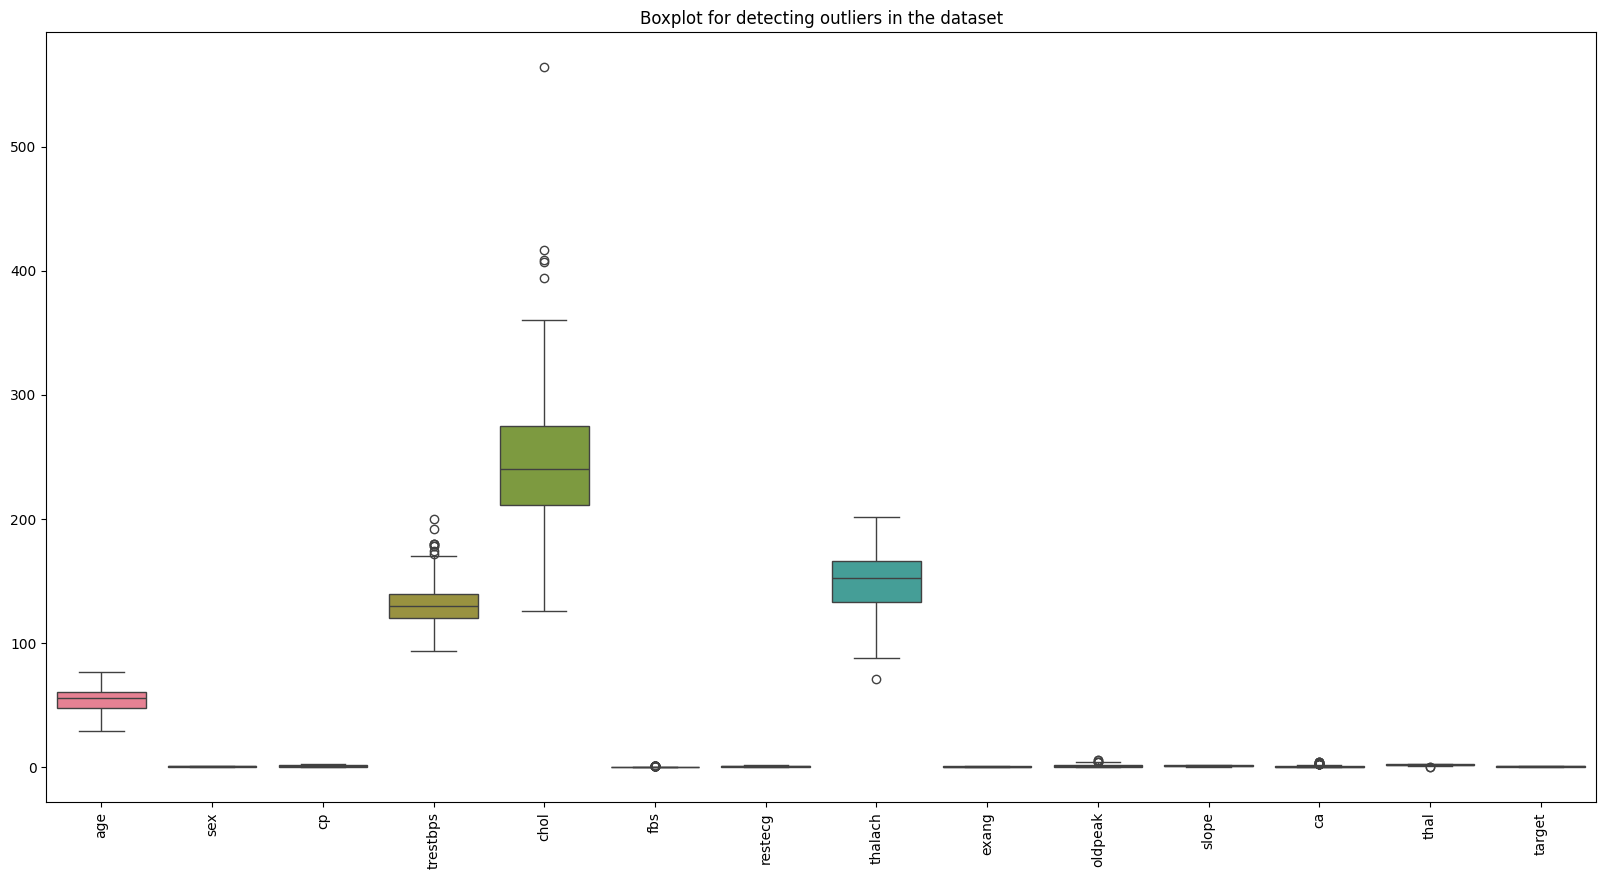

In [28]:
# Plotting boxplots for each column in the dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot for detecting outliers in the dataset')
plt.show()

**Outliers can sometimes represent valuable information, especially in medical datasets where outliers could indicate patients with unusual symptoms or conditions. Removing outliers without careful consideration could lead to loss of critical information that might be important for predicting heart disease. It's essential to analyze the cause of the outliers and decide based on domain knowledge and the objectives of the analysis.**

#Logistic Regression
Build a logistic regression model

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
#Split the dataset into 70:30 ratio
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [79]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Creating the Logistic Regression model
log_reg = LogisticRegression()

In [81]:
# Defining hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

In [82]:
# Creating GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

In [83]:
# Fitting the model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [84]:
# Best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [159]:
# Evaluating the model
y_pred = grid_search.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        44
           1       0.77      0.85      0.81        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [158]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", log_reg_accuracy)

Accuracy: 0.7912087912087912


In [86]:
#Confusion matrix
print("Logistic Regression Confusion matrix: \n",confusion_matrix(y_test, y_pred))

Logistic Regression Confusion matrix: 
 [[32 12]
 [ 7 40]]


#Decision Tree
Build a decision tree model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
#Split the dataset into 70:30 ratio
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [89]:
# Standardizing the features
scaler_dt = StandardScaler()
X_train_scaled_dt = scaler.fit_transform(X_train_dt)
X_test_scaled_dt = scaler.transform(X_test_dt)

In [90]:
# Creating a decision tree classifier
dt_classifier = DecisionTreeClassifier()

In [92]:
# Defining hyperparameters to tune
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [93]:
# Creating GridSearchCV object
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', verbose=1)

In [109]:
# Fitting the model
grid_search_dt.fit(X_train_scaled_dt, y_train_dt)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [110]:
# Best parameters found
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [161]:
# Evaluating the model
y_pred_dt = grid_search_dt.predict(X_test_scaled_dt)
print("\nClassification Report:")
print(classification_report(y_test_dt, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [160]:
dt_accuracy = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.8351648351648352


In [113]:
#Confusion matrix
print("Decision Tree Confusion matrix: \n",confusion_matrix(y_test_dt, y_pred_dt))

Decision Tree Confusion matrix: 
 [[35  9]
 [ 6 41]]


#Random Forest
Build a Random Forest model

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
#Split the dataset into 70:30 ratio
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [133]:
# Standardizing the features
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)

In [135]:
# Creating a random forest classifier
rf_classifier = RandomForestClassifier()

In [136]:
# Defining hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [137]:
# Creating GridSearchCV object
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

In [138]:
# Fitting the model
grid_search_rf.fit(X_train_scaled_rf, y_train_rf)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [139]:
# Best parameters found
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [163]:
# Evaluating the model
y_pred_rf = grid_search_rf.predict(X_test_scaled_rf)
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        44
           1       0.75      0.85      0.80        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [162]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy:", rf_accuracy)

Accuracy: 0.7802197802197802


**SELECT THE BEST MODEL**

In [151]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [153]:
#Calculate Recall, Precision, and F1 score of all the models
logmodel_recall = recall_score(y_test, y_pred)
logmodel_precision = precision_score(y_test, y_pred)
logmodel_f1_score = f1_score(y_test, y_pred)

dt_recall = recall_score(y_test_dt, y_pred_dt)
dt_precision = precision_score(y_test_dt, y_pred_dt)
dt_f1_score = f1_score(y_test_dt, y_pred_dt)

rf_recall = recall_score(y_test_rf, y_pred_rf)
rf_precision = precision_score(y_test_rf, y_pred_rf)
rf_f1_score = f1_score(y_test_rf, y_pred_rf)

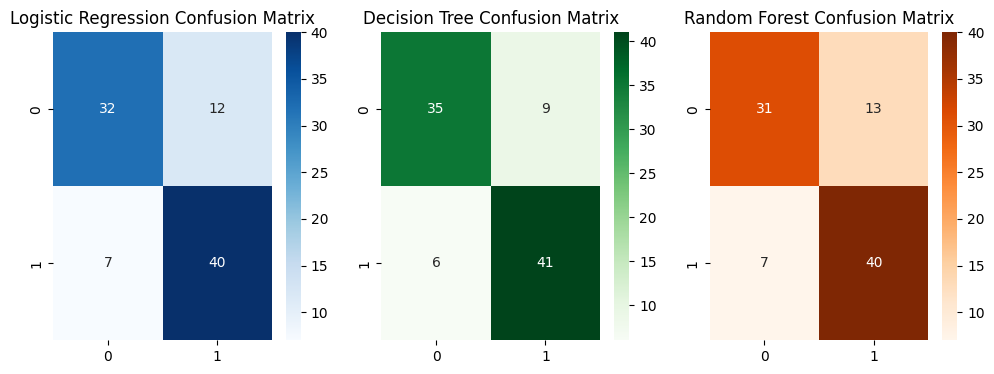

In [154]:
#Visualize confusion matrix using heatmaps
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test_dt, y_pred_dt), annot=True, cmap='Greens', fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, cmap='Oranges', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [164]:
#Select the best model based on the best accuracies
accuracies = {'Logistic Regression': log_reg_accuracy, 'Decision Tree': dt_accuracy, 'Random Forest': rf_accuracy}
best_model = max(accuracies, key=accuracies.get)
print("Best Model:", best_model)

Best Model: Decision Tree


In [166]:
# Accessing the best estimator
best_dt_estimator = grid_search_dt.best_estimator_

In [170]:
# Creating a DataFrame to store feature importances
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': best_dt_estimator.feature_importances_})

In [171]:
# Sorting the DataFrame by feature importance in descending order
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

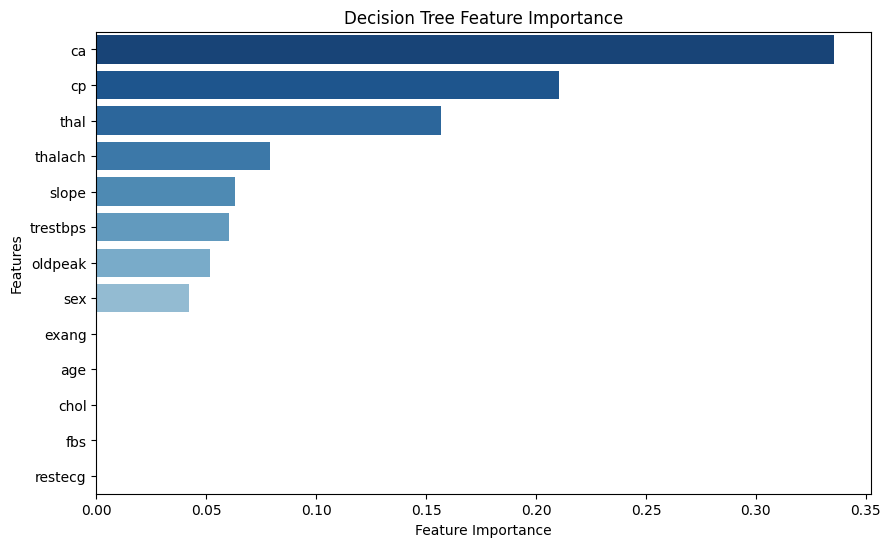

In [172]:
# Plotting feature importance using seaborn with a specified palette
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', palette="Blues_r")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

 **Recommendations**

---



**1) Focus on 'ca'**: The feature 'ca' (possibly referring to the number of major vessels colored by fluoroscopy) has the highest importance score. Medical assessments that provide information on this feature should be prioritized in diagnosing heart disease.
**2) Consider 'cp'**: The feature 'cp' (chest pain type) is also highly important. Detailed evaluation of chest pain characteristics can be crucial in heart disease identification.
**3) Evaluate 'thal'**: The 'thal' feature, which might refer to thallium stress test results, is another significant predictor. Ensure that thallium stress testing is included in the diagnostic process when appropriate.
**4) 'thalach'**: 'Thalach' (maximum heart rate achieved) has a moderate importance score. Recording and evaluating the maximum heart rate during stress tests or physical examinations can be informative.
**5) 'slope'**: The 'slope' of the peak exercise ST segment is also a feature to consider. ST segment evaluation during an ECG can provide valuable insights.
**6) 'trestbps'**: 'Trestbps' (resting blood pressure) is a feature with lower importance but should still be monitored as part of a routine check-up.
**7) 'oldpeak'**: 'Oldpeak' (ST depression induced by exercise relative to rest) is another feature to consider when evaluating patients for heart disease.
**8) Gender-specific analysis**: The 'sex' feature indicates that gender may play a role in heart disease identification, so consider gender-specific risk factors and presentation.

**Other features**: While 'exang' (exercise-induced angina), 'age', 'chol' (serum cholesterol), 'fbs' (fasting blood sugar), and 'restecg' (resting electrocardiographic results) have lower importance scores, they should not be ignored. A comprehensive approach that includes these factors can provide a more complete assessment of heart disease risk.

It's important to note that these recommendations are based solely on the feature importance scores from a decision tree model. Clinical decisions should always be made in the context of a comprehensive evaluation, including patient history, physical examination, and other diagnostic tests as deemed necessary by healthcare professionals.


**Conclusions**

---
The purpose of such a model is to assist healthcare professionals in identifying individuals who are at higher risk of heart disease based on certain predictors. By understanding which features are most influential in predicting heart disease, medical professionals can better screen for and monitor these risk factors in their patients.

However, the model itself does not directly reduce the incidence of heart attacks. To reduce heart attacks, the insights from the model must be applied in clinical practice to:

1) Improve early detection and intervention for those at high risk.
2) Guide lifestyle modifications and preventive measures.
3) Inform treatment plans that may include medication, lifestyle changes, or other medical interventions.

The effectiveness of the model in reducing heart attacks would depend on how well it predicts heart disease and how its insights are used in patient care.
It's also important to integrate the model's predictions with other clinical information and judgment for the best patient outcomes.

